# **EFFORT ESTIMATION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 4.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import xgboost as xgb
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **DESHARNAIS DATASET**

In [5]:
df_desharnais = pd.read_csv('/content/drive/My Drive/Effort Estimation/02.desharnais.csv',  header=0)

In [6]:
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


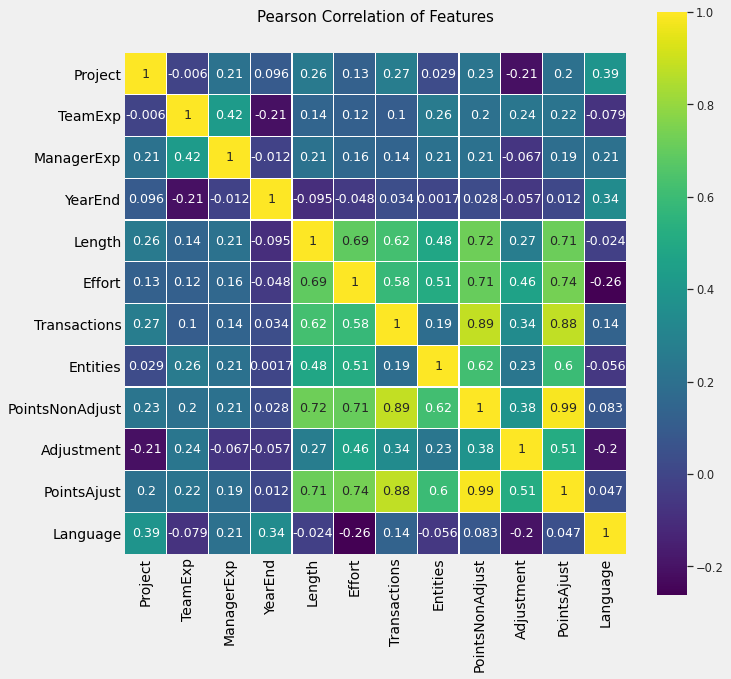

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [8]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

SUPPORT VECTOR REGRESSION

In [9]:
sv = SVR(kernel='linear', epsilon=0.00001, C=1000, tol=1000).fit(X_train, y_train)
predictions = sv.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Magnitude of Relative Error:", np.abs(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.005853066738621118
Magnitude of Relative Error: 0.06280178137420774
R^2 Score:  0.7751197824150536


RIDGE REGRESSION

In [193]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.00001)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.006367585631260765
R^2 Score:  0.7553514924406892


LASSO REGRESSION

In [194]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True, alpha=0.00001)
lasso_reg.fit(X_train,y_train)
predictions =lasso_reg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.006367585961027412
R^2 Score:  0.7553514797707508


ELASTIC NET REGRESSION


In [195]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0, alpha=0.00001, max_iter=10000000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.006367585943435604
R^2 Score:  0.7553514804466442


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192572227.72329685, tolerance: 76655.55304
  positive)


BAGGING SVR

In [196]:
from sklearn.ensemble import BaggingRegressor
sv = SVR(kernel='linear', C=100, gamma='auto').fit(X_train, y_train)
regr = BaggingRegressor(base_estimator=sv, n_estimators=25, random_state=0).fit(X_train, y_train)
predictions = regr.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.005285766550246013
R^2 Score:  0.7969159784085115


ADABOOST SVR

In [10]:
from sklearn.ensemble import AdaBoostRegressor
sv = SVR(kernel='linear', C=100, gamma='auto').fit(X_train, y_train)
regr = AdaBoostRegressor(base_estimator=sv, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Magnitude of Relative Error:", np.abs(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.0076493301611483926
Magnitude of Relative Error: 0.06622483976754477
R^2 Score:  0.7061056864997597


RIDGE - SVR

In [198]:
reg1 = Ridge(alpha=0.00001)
reg2 = SVR(kernel='linear', C=100, gamma='auto')
ereg = VotingRegressor(estimators=[('r', reg1), ('sv', reg2)])
ereg = ereg.fit(X, y)
predictions = ereg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.004204008551327116
R^2 Score:  0.8384781175459248


LASSO - SVR

In [199]:
reg1 = Lasso(normalize=True, alpha=0.00001)
reg2 = SVR(kernel='linear', C=100, gamma='auto')
ereg = VotingRegressor(estimators=[('l', reg1), ('sv', reg2)])
ereg = ereg.fit(X, y)
predictions = ereg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.004204008571731637
R^2 Score:  0.8384781167619644


LASSO - RIDGE - SVR

In [200]:
reg1 = Lasso(normalize=True, alpha=0.00001)
reg2 = SVR(kernel='linear', C=100, gamma='auto')
reg3 = Ridge(alpha=0.00001)
ereg = VotingRegressor(estimators=[('l', reg1), ('sv', reg2), ('r', reg3)])
ereg = ereg.fit(X, y)
predictions = ereg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.004177011311421965
R^2 Score:  0.8395153763805121


LASSO - RIDGE - ELASTIC NET - SVR

In [201]:
reg1 = Lasso(normalize=True, alpha=0.00001)
reg2 = SVR(kernel='linear', C=100, gamma='auto')
reg3 = Ridge(alpha=0.00001)
reg4 = ElasticNet(random_state=0, alpha=0.00001)
ereg = VotingRegressor(estimators=[('l', reg1), ('sv', reg2), ('r', reg3), ('e', reg4)])
ereg = ereg.fit(X, y)
predictions = ereg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.004168015231634236
R^2 Score:  0.8398610140556692


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265422941.02604264, tolerance: 156204.0305283951
  positive)


**CROSS VALIDATION**


In [292]:
sv = SVR(kernel='linear', epsilon=0.00001, C=1000, tol=1000)
cv_r2_scores_rf = cross_val_score(sv, X, y, cv=3, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.43779766 0.31192581 0.7331523 ]
Mean 5-Fold R Squared: 0.4942919223113977


In [293]:
model = Ridge(alpha=10)
cv_r2_scores_rf = cross_val_score(model, X, y, cv=3, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.44563962 0.2704966  0.71984547]
Mean 5-Fold R Squared: 0.47866056322867157


In [295]:
model = Lasso(normalize=True, alpha=10)
cv_r2_scores_rf = cross_val_score(model, X, y, cv=3, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.41959468 0.26439323 0.76403922]
Mean 5-Fold R Squared: 0.48267570967488843


In [298]:
from sklearn.ensemble import BaggingRegressor
sv = SVR(kernel='linear', C=100, gamma='auto')
regr = BaggingRegressor(base_estimator=sv, n_estimators=25, random_state=0)
cv_r2_scores_rf = cross_val_score(regr, X, y, cv=3, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.41622695 0.30258807 0.73427324]
Mean 5-Fold R Squared: 0.48436275136644474


In [296]:
reg1 = Ridge(alpha=10)
reg2 = SVR(kernel='linear', epsilon=0.00001, C=1000, tol=1000)
ereg = VotingRegressor(estimators=[('r', reg1), ('sv', reg2)])
cv_r2_scores_rf = cross_val_score(ereg, X, y, cv=3, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.46136381 0.303581   0.73521763]
Mean 5-Fold R Squared: 0.5000541445993977


In [297]:
reg1 = Lasso(normalize=True, alpha=10)
reg2 = SVR(kernel='linear', epsilon=0.00001, C=1000, tol=1000)
ereg = VotingRegressor(estimators=[('r', reg1), ('sv', reg2)])
cv_r2_scores_rf = cross_val_score(ereg, X, y, cv=3, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.44767022 0.2990431  0.76431945]
Mean 5-Fold R Squared: 0.5036775902502703


In [299]:
reg1 = Lasso(normalize=True, alpha=10)
reg2 = SVR(kernel='linear', epsilon=0.00001, C=1000, tol=1000)
reg3 = Ridge(alpha=10)
ereg = VotingRegressor(estimators=[('r', reg1), ('sv', reg2), ('l', reg3)])
cv_r2_scores_rf = cross_val_score(ereg, X, y, cv=3, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.45267864 0.29265479 0.75273805]
Mean 5-Fold R Squared: 0.4993571609612612


# **NASA93 DATASET**

In [42]:
df_nasa = pd.read_csv('/content/drive/My Drive/Effort Estimation/nasa93.csv',  header=0)

In [43]:
df_nasa.corr()

,RELY,DATA,CPLX,TIME,STOR,VIRT,TURN,ACAP,AEXP,PCAP,VEXP,LEXP,MODP,TOOL,SCED,LOC,Effort
RELY,1.000000,0.017181,0.558339,0.527837,0.404057,0.064625,-0.079948,0.164720,0.137802,0.098820,-0.070942,0.024231,-0.038574,-0.068123,0.078320,0.201751,0.476101
DATA,0.017181,1.000000,0.010500,0.479292,0.253045,0.304024,0.586670,-0.419246,-0.110416,0.049142,0.060223,-0.134746,-0.245305,-0.272766,0.155011,0.046068,0.200008
CPLX,0.558339,0.010500,1.000000,0.464718,0.335010,-0.061852,0.001367,-0.031229,0.126204,0.103365,0.017501,0.109050,0.038496,-0.151341,0.013911,0.142766,0.321583
TIME,0.527837,0.479292,0.464718,1.000000,0.704249,0.308197,0.395582,-0.298003,-0.114980,-0.047789,0.194454,0.090873,-0.149034,-0.173864,0.031650,0.137023,0.533867
STOR,0.404057,0.253045,0.335010,0.704249,1.000000,0.142663,0.284230,-0.367350,-0.193354,-0.188560,0.049221,0.167841,-0.059652,-0.130172,0.048118,0.001153,0.370335
VIRT,0.064625,0.304024,-0.061852,0.308197,0.142663,1.000000,0.288015,0.162312,0.055855,0.048210,0.070300,0.338472,0.007065,0.131147,-0.283370,-0.030349,0.121227
TURN,-0.079948,0.586670,0.001367,0.395582,0.284230,0.288015,1.000000,-0.263410,-0.029998,0.084813,0.031018,0.099610,-0.036736,-0.365704,0.130516,-0.107783,0.046869
ACAP,0.164720,-0.419246,-0.031229,-0.298003,-0.367350,0.162312,-0.263410,1.000000,0.513837,0.405269,-0.130721,0.043035,0.142980,0.195407,-0.017116,-0.206199,-0.113156
AEXP,0.137802,-0.110416,0.126204,-0.114980,-0.193354,0.055855,-0.029998,0.513837,1.000000,0.605183,-0.045961,0.060864,-0.180447,-0.096478,0.303546,-0.228595,-0.110117
PCAP,0.098820,0.049142,0.103365,-0.047789,-0.188560,0.048210,0.084813,0.405269,0.605183,1.000000,0.020553,0.033560,-0.243856,-0.367591,0.255568,-0.308472,-0.173166


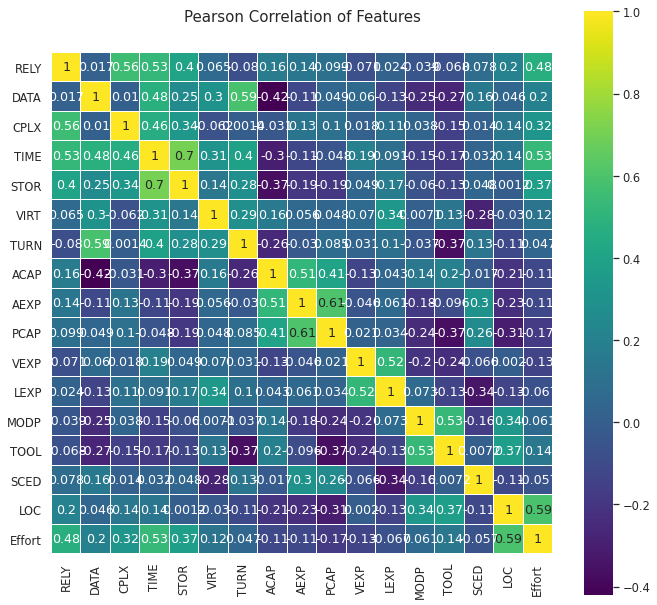

In [44]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_nasa.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [45]:
X=df_nasa.loc[:,df_nasa.columns !="Effort"]
y=df_nasa["Effort"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

SUPPORT VECTOR REGRESSION

In [46]:
sv = SVR(kernel='linear', epsilon=0.00001, C=1000, tol=1000).fit(X_train, y_train)
predictions = sv.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Mean Magnitude of Relative Error:", np.abs(np.divide(np.subtract(y_test,predictions), y_test)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.008067861874481608
Mean Magnitude of Relative Error: 6.274855604181395
R^2 Score:  0.8007978720293754


ADABOOST SVR

In [47]:
from sklearn.ensemble import AdaBoostRegressor
sv = SVR(kernel='linear', epsilon=0.00001, C=1000, tol=1000).fit(X_train, y_train)
regr = AdaBoostRegressor(base_estimator=sv, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Mean Magnitude of Relative Error:", np.abs(np.divide(np.subtract(y_test,predictions), y_test)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.006159110612873669
Mean Magnitude of Relative Error: 6.0908801264879475
R^2 Score:  0.8479265064797945


MLPNN REGRESSOR

In [48]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=30000).fit(X_train, y_train)
predictions = regr.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Mean Magnitude of Relative Error:", np.abs(np.divide(np.subtract(y_test,predictions), y_test)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.00921703279599638
Mean Magnitude of Relative Error: 2.321703835706476
R^2 Score:  0.7724238992805651


ADABOOST - MLPNN REGRESSOR 

In [49]:
from sklearn.ensemble import AdaBoostRegressor
mlp = MLPRegressor(random_state=1, max_iter=30000).fit(X_train, y_train)
regr = AdaBoostRegressor(base_estimator=mlp, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test).astype(int)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Mean Magnitude of Relative Error:", np.abs(np.divide(np.subtract(y_test,predictions), y_test)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.010367593367394415
Mean Magnitude of Relative Error: 1.4148075293922442
R^2 Score:  0.744015614936169


# **NASA63 DATASET**

In [29]:
df_cocomo = pd.read_csv('/content/drive/My Drive/Effort Estimation/cocomo81.csv',  header=0)

In [30]:
df_cocomo.corr()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
rely,1.000000,-0.030913,0.558540,0.702636,0.653910,0.302531,-0.014927,-0.443981,-0.235341,-0.326920,0.137762,0.341757,-0.216759,-0.041416,0.116957,0.040705,0.206703
data,-0.030913,1.000000,-0.327894,-0.097401,-0.067536,-0.215133,0.162717,0.152171,0.088672,0.294558,-0.148019,-0.249607,0.128880,-0.263361,-0.041298,0.366830,0.444551
cplx,0.558540,-0.327894,1.000000,0.487280,0.518444,0.313410,-0.021355,-0.460169,-0.119831,-0.450872,0.302794,0.480166,-0.127585,0.265312,0.134810,-0.201153,0.010049
time,0.702636,-0.097401,0.487280,1.000000,0.677825,0.445400,0.011684,-0.323218,-0.142139,-0.258279,0.297234,0.441756,-0.080393,0.147607,0.120221,-0.054815,0.152485
stor,0.653910,-0.067536,0.518444,0.677825,1.000000,0.415795,0.187268,-0.191920,-0.208944,-0.179018,0.154849,0.372211,0.107660,0.221055,-0.059505,-0.034909,0.104838
virt,0.302531,-0.215133,0.313410,0.445400,0.415795,1.000000,0.206098,-0.155702,0.061194,-0.162539,0.697887,0.692414,0.135768,0.518549,0.253547,-0.188589,0.018668
turn,-0.014927,0.162717,-0.021355,0.011684,0.187268,0.206098,1.000000,0.129532,0.014628,0.120081,-0.029815,0.038096,0.498751,0.342534,0.093875,0.083331,0.205883
acap,-0.443981,0.152171,-0.460169,-0.323218,-0.191920,-0.155702,0.129532,1.000000,0.376905,0.667691,-0.277306,-0.378156,0.384362,0.028057,0.090796,-0.137508,-0.147865
aexp,-0.235341,0.088672,-0.119831,-0.142139,-0.208944,0.061194,0.014628,0.376905,1.000000,0.097782,0.231153,0.043004,-0.052095,-0.145890,0.352354,-0.110563,-0.035519
pcap,-0.326920,0.294558,-0.450872,-0.258279,-0.179018,-0.162539,0.120081,0.667691,0.097782,1.000000,-0.202041,-0.306632,0.530107,0.030638,-0.084808,0.158249,0.156916


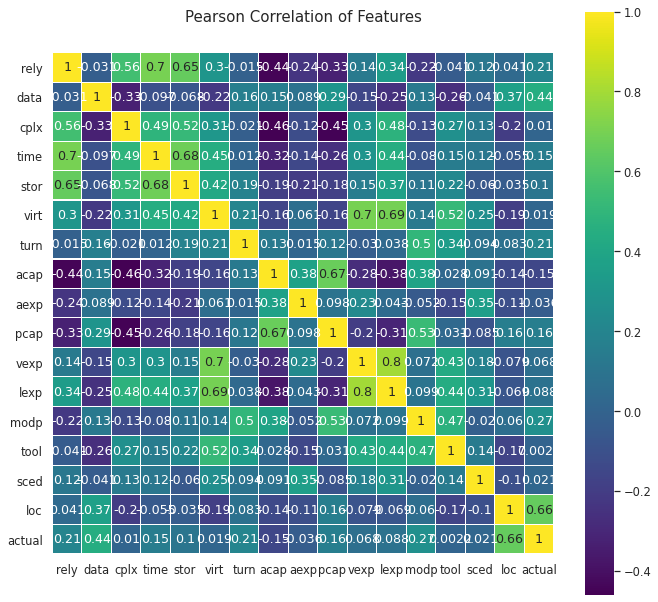

In [31]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_cocomo.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [32]:
X=df_cocomo.loc[:,df_cocomo.columns !="actual"]
y=df_cocomo["actual"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

DECISION TREE REGRESSOR

In [33]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Mean Magnitude of Relative Error:", np.abs(np.divide(np.subtract(y_test,predictions), y_test)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.0006523856007735206
Mean Magnitude of Relative Error: 1.7219427305082973
R^2 Score:  0.9903997785646356


EXTREME GRADIENT BOOSTED DECISION TREE REGRESSOR

In [34]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.05, max_depth = 3, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
predictions = xg_reg.predict(X_test)
norm1 = np.linalg.norm(predictions)
predictions = predictions/norm1
norm2 = np.linalg.norm(y_test)
y_test = y_test/norm2
print("Mean Squared Error:", np.square(np.subtract(y_test,predictions)).mean())
print("Mean Magnitude of Relative Error:", np.abs(np.divide(np.subtract(y_test,predictions), y_test)).mean())
from sklearn.metrics import r2_score
print("R^2 Score: ", r2_score(y_test, predictions))

Mean Squared Error: 0.0003986546939102479
Mean Magnitude of Relative Error: 2.1385289197590187
R^2 Score:  0.994133571720087
